In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df =  pd.read_csv('Cardio-Good-Fitness.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.shape

(180, 9)

In [5]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

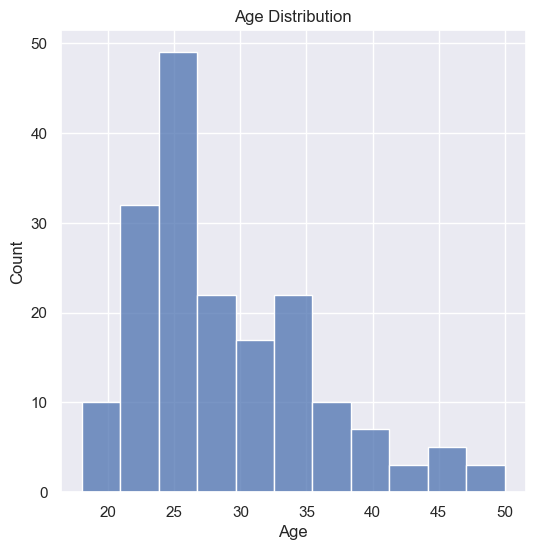

In [8]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(df['Age'])
plt.title("Age Distribution")
plt.show()

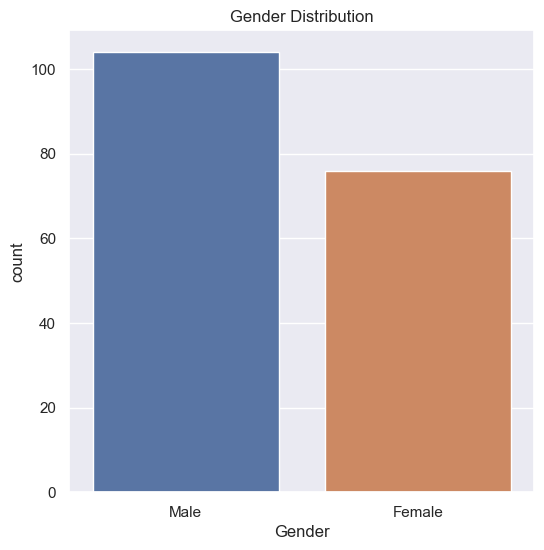

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x="Gender",data=df)
plt.title("Gender Distribution")
plt.show()

In [10]:
df['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

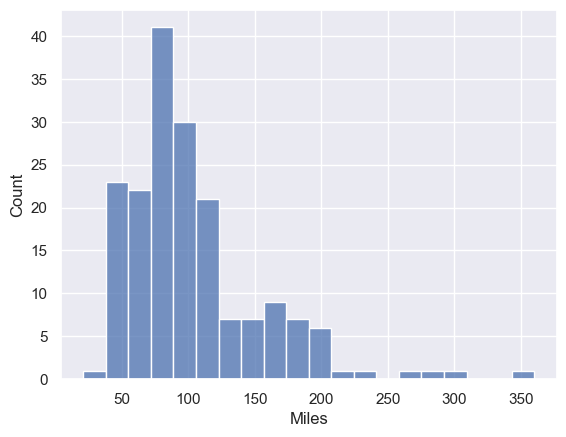

In [11]:
sns.histplot(df['Miles'])
plt.show()

In [12]:
df['Product'].value_counts()

Product
TM195    80
TM498    60
TM798    40
Name: count, dtype: int64

In [13]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [14]:
df.replace({'MaritalStatus':{'Single':0,'Partnered':1}},inplace=True)

In [51]:
x = df.drop(columns="Product",axis=1)
y = df['Income']

In [52]:
x

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,18,0,14,0,3,4,29562,112
1,19,0,15,0,2,3,31836,75
2,19,1,14,1,4,3,30699,66
3,19,0,12,0,3,3,32973,85
4,20,0,13,1,4,2,35247,47
...,...,...,...,...,...,...,...,...
175,40,0,21,0,6,5,83416,200
176,42,0,18,0,5,4,89641,200
177,45,0,16,0,5,5,90886,160
178,47,0,18,1,4,5,104581,120


In [53]:
y

0       29562
1       31836
2       30699
3       32973
4       35247
        ...  
175     83416
176     89641
177     90886
178    104581
179     95508
Name: Income, Length: 180, dtype: int64

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [55]:
x_train.shape

(144, 8)

In [56]:
x_test.shape

(36, 8)

In [57]:
reg = LinearRegression()

In [58]:
reg.fit(x_train,y_train)

LinearRegression()

In [59]:
training_data_prediction = reg.predict(x_train)

In [60]:
r2_train = metrics.r2_score(y_train, training_data_prediction)

In [61]:
r2_train

1.0

In [62]:
test_data_prediction = reg.predict(x_test)

In [63]:
r2_test = metrics.r2_score(y_test, test_data_prediction)

In [64]:
r2_test

1.0

In [124]:
sample_input_data = (30000,25000,15400,10000,24000,55000,62000,70000)

In [125]:
input_np_array = np.asarray(sample_input_data)

In [128]:
input_data_reshaped = input_np_array.reshape(1,-1)

In [129]:
prediction = reg.predict(input_data_reshaped)

C:\Users\Harshit Wadhawan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [130]:
print("The income groups who purchased more are",prediction)

The income groups who purchased more are [62000.00000025]
